In [1]:
pip install twython 

In [2]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [3]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
# table=pd.read_html('https://www.barchart.com/stocks/indices/sp/sp500?page=all')
df = table[0]
df_sector = df
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
#ticker_df = pd.read_csv('tickers.csv')

In [5]:
list = df.replace({'BRK.B':'BRK-B', 'BF.B':'BF-B'})
newlist = list['Symbol'].to_numpy()
newlist

array(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN',
       'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP',
       'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS',
       'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T',
       'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC',
       'BK', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA',
       'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW',
       'COG', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR',
       'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN',
       'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI',
       'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS',
       'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ',
 

In [6]:
from urllib.error import *

news_tables = {}
tickers = newlist

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'}) 
    try:
      response = urlopen(req)  
    # except urllib.error.URLError as e:
    #   msg = "Unable to open\n\n%s\n\ndue to the error\n\n%s\n\n" % (url, e)
    except urllib.error.URLError as e:
      print(url)
    # else:
      # Process data get from the URL opened
      # If an exception has been catch, you won't 
      # enter in this else block
      # print("No problem!")

    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table


In [ ]:
news_tables

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text'
    hyperlink = table_row.a.get('href') 
    print(a_text)
    print(td_text)
    print(hyperlink)
    # Exit after printing 4 rows of data
    if i == 3:
        break

In [ ]:
amzn_tr

In [ ]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        hyperlink = x.a.get('href')
        
        # Append ticker, date, time and headline, news URL as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text, hyperlink])

In [8]:
parsed_news

[['MMM',
  'Jun-10-21',
  '08:42AM',
  '3M helps U.S. Marshals seize over one million suspected counterfeit N95s from Kentucky warehouse',
  'https://finance.yahoo.com/news/3m-helps-u-marshals-seize-124200805.html'],
 ['MMM',
  'Jun-07-21',
  '05:45PM',
  '3M (MMM) Dips More Than Broader Markets: What You Should Know',
  'https://finance.yahoo.com/news/3m-mmm-dips-more-broader-214509531.html'],
 ['MMM',
  'Jun-07-21',
  '10:29AM',
  '10 Small-Cap AI Stocks',
  'https://finance.yahoo.com/news/10-small-cap-ai-stocks-142922276.html'],
 ['MMM',
  'Jun-04-21',
  '10:33AM',
  '10 Best Passive Income Stocks in 2021',
  'https://finance.yahoo.com/news/10-best-passive-income-stocks-143304918.html'],
 ['MMM',
  'Jun-02-21',
  '05:50PM',
  '3M (MMM) Gains But Lags Market: What You Should Know',
  'https://finance.yahoo.com/news/3m-mmm-gains-lags-market-215009871.html'],
 ['MMM',
  'Jun-02-21',
  '09:35AM',
  '3M Partners with Pandemic Action Network to Improve Global Response and Prepare for Futu

In [9]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline', 'hyperlink']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,hyperlink,neg,neu,pos,compound
0,MMM,2021-06-10,08:42AM,3M helps U.S. Marshals seize over one million ...,https://finance.yahoo.com/news/3m-helps-u-mars...,0.115,0.727,0.158,0.1779
1,MMM,2021-06-07,05:45PM,3M (MMM) Dips More Than Broader Markets: What ...,https://finance.yahoo.com/news/3m-mmm-dips-mor...,0.000,1.000,0.000,0.0000
2,MMM,2021-06-07,10:29AM,10 Small-Cap AI Stocks,https://finance.yahoo.com/news/10-small-cap-ai...,0.000,1.000,0.000,0.0000
3,MMM,2021-06-04,10:33AM,10 Best Passive Income Stocks in 2021,https://finance.yahoo.com/news/10-best-passive...,0.000,0.455,0.545,0.7184
4,MMM,2021-06-02,05:50PM,3M (MMM) Gains But Lags Market: What You Shoul...,https://finance.yahoo.com/news/3m-mmm-gains-la...,0.194,0.620,0.186,-0.0258


In [10]:
from google.colab import drive
drive.mount('/drive')
parsed_and_scored_news.to_excel('/drive/My Drive/SGUS Fintech Algo-trading BI Project/Working Folders/Phase 3 Integration Algo-T + BI/JW/parsed_and_scored_news.xlsx')
parsed_and_scored_news.to_csv('/drive/My Drive/SGUS Fintech Algo-trading BI Project/Working Folders/Phase 3 Integration Algo-T + BI/JW/parsed_and_scored_news.csv')

Mounted at /drive


In [ ]:
# # Group by date and ticker columns from scored_news and calculate the mean
# mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# # Unstack the column ticker
# mean_scores = mean_scores.unstack()

# # Get the cross-section of compound in the 'columns' axis
# mean_scores = mean_scores.xs('compound', axis="columns").transpose()


In [ ]:
# mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
# mean_scores = mean_scores.unstack()
# mean_scores = mean_scores.xs('compound', axis="columns")

mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

In [ ]:
mean_scores

ticker  date      
A       2021-02-17    0.000000
        2021-02-18   -0.098667
        2021-02-19    0.202300
        2021-02-22   -0.318200
        2021-03-02    0.123150
                        ...   
ZTS     2021-05-24    0.000000
        2021-05-27    0.381800
        2021-05-31    0.000000
        2021-06-02    0.904200
        2021-06-03    0.726900
Name: compound, Length: 28776, dtype: float64

In [ ]:
# export = mean_scores[::-1][:126]
# export

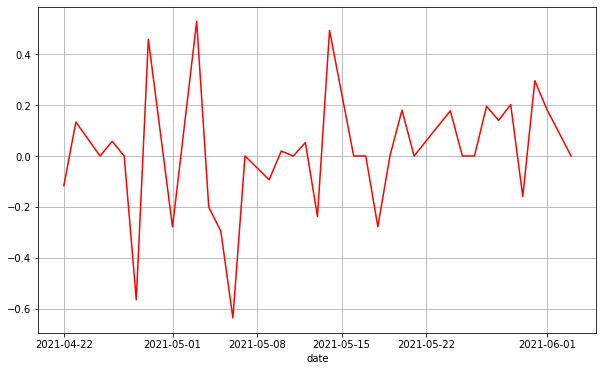

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]

# mean_scores
# Plot a bar chart with pandas
exmaple = mean_scores['AAL']
exmaple.plot(kind = 'line',x='date',y='mean_scores',color='red')
plt.grid()

In [ ]:
from google.colab import drive
drive.mount('/drive')
mean_scores.to_excel('/drive/My Drive/SGUS Fintech Algo-trading BI Project/Working Folders/Phase 3 Integration Algo-T + BI/JW/News_Sentiment_MeanScore.xlsx')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
sector_list = df_sector.drop(['SEC filings','Security','GICS Sub-Industry','Date first added','Founded','CIK','Headquarters Location'], axis='columns')
sector_list

,Symbol,GICS Sector
0,MMM,Industrials
1,ABT,Health Care
2,ABBV,Health Care
3,ABMD,Health Care
4,ACN,Information Technology
...,...,...
500,YUM,Consumer Discretionary
501,ZBRA,Information Technology
502,ZBH,Health Care
503,ZION,Financials


In [ ]:
from google.colab import drive
drive.mount('/drive')
sector_list.to_excel('/drive/My Drive/SGUS Fintech Algo-trading BI Project/Working Folders/Phase 3 Integration Algo-T + BI/JW/Sector_List.xlsx')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
